In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

## Read in Parking Violation Data

In [ ]:
pv = pd.read_csv('/Users/Hong/Desktop/Crime-in-Philadelphia/Winter 20-21/Parking Violations/Parking-Violation.csv', index_col=False)

In [ ]:
pv.head()

,Unnamed: 0,zip_code,issue_datetime,state,violation_desc,fine,issuing_agency,lat,lon,location,events,year,date
0,2,19118.0,2016-10-14 16:01:00,PA,METER EXPIRED,26.0,PPA,40.076825,-75.207777,8600 GERMANTOWN AVE,1,2016,2016-10-14
1,3,19107.0,2016-10-14 21:42:00,PA,METER EXPIRED CC,36.0,PPA,39.950106,-75.157848,1013 CHESTNUT ST,1,2016,2016-10-14
2,4,19107.0,2016-11-13 07:40:00,PA,METER EXPIRED CC,36.0,PPA,39.949713,-75.154705,800 CHESTNUT ST,1,2016,2016-11-13
3,6,19148.0,2016-11-10 13:17:00,PA,OVER TIME LIMIT,26.0,PPA,39.929218,-75.168272,1399 MORRIS ST,1,2016,2016-11-10
4,7,19107.0,2016-12-30 20:53:00,PA,METER EXPIRED CC,36.0,PPA,39.956122,-75.154116,234 N 9TH ST,1,2016,2016-12-30


In [ ]:
pv[["zip_code", "fine", "lat", "lon", "year"]].describe().apply(lambda s: s.apply('{0:.5f}'.format))

,zip_code,fine,lat,lon,year
count,5760749.00000,5760749.00000,5760749.00000,5760749.00000,5760749.00000
mean,19123.06670,44.77662,39.96704,-75.16370,2014.62007
std,17.76986,34.99045,0.03524,0.03532,1.72497
min,19102.00000,15.00000,39.57073,-75.98698,2012.00000
25%,19104.00000,26.00000,39.94768,-75.17574,2013.00000
50%,19123.00000,36.00000,39.95369,-75.16473,2015.00000
75%,19142.00000,51.00000,39.97059,-75.15060,2016.00000
max,19192.00000,1001.00000,40.36864,-74.96297,2017.00000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e96dac0>,
      dtype=object)

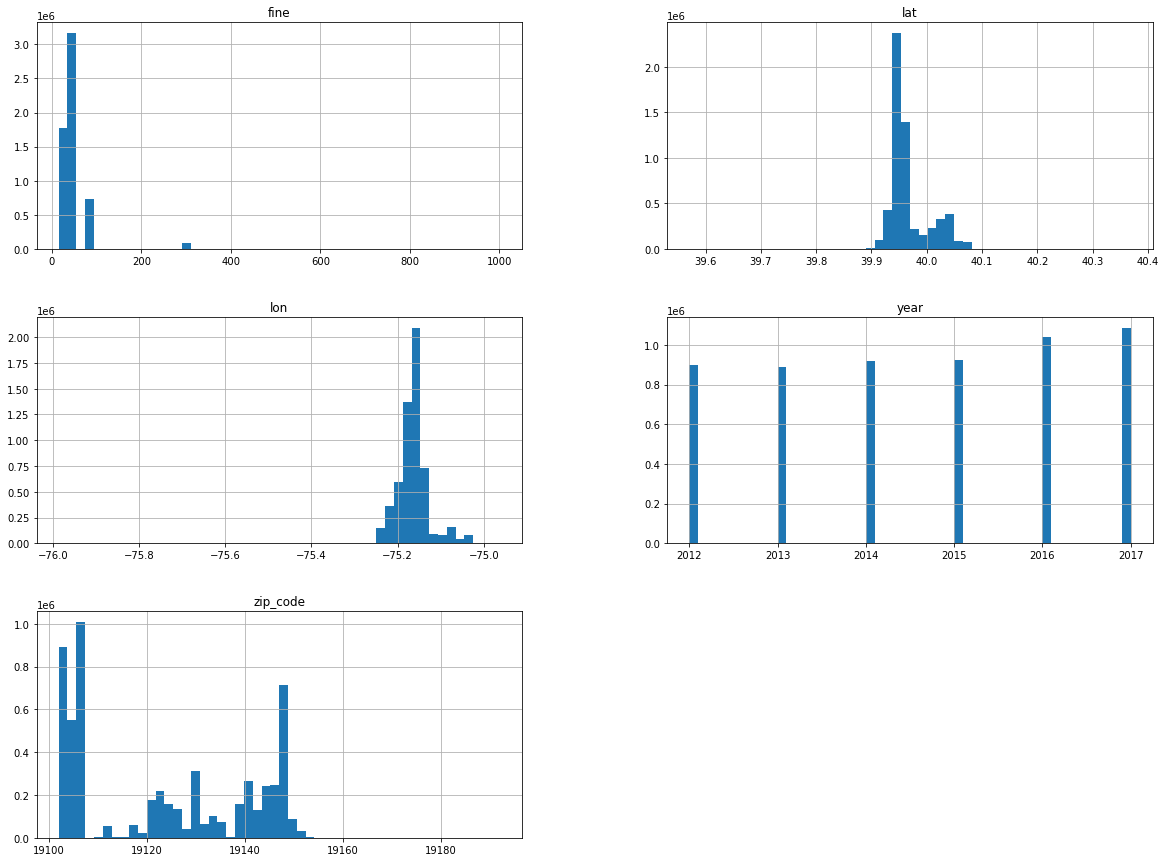

In [ ]:
pv[["zip_code", "fine", "lat", "lon", "year"]].hist(bins=50, figsize=(20,15))

In [ ]:
pv = pv[["lat", "lon", "zip_code"]]

In [ ]:
len(pv)

5760749

In [ ]:
for p in pv:
    value = pv[p].isnull().sum()
    if (value>0):
        print("There are", value, " missing values in column",p)

In [ ]:
pv.zip_code.value_counts().index

Float64Index([19103.0, 19107.0, 19104.0, 19147.0, 19106.0, 19130.0, 19146.0,
              19102.0, 19123.0, 19148.0, 19139.0, 19145.0, 19140.0, 19141.0,
              19127.0, 19124.0, 19121.0, 19144.0, 19149.0, 19120.0, 19142.0,
              19134.0, 19118.0, 19143.0, 19111.0, 19128.0, 19136.0, 19132.0,
              19125.0, 19133.0, 19135.0, 19129.0, 19122.0, 19131.0, 19119.0,
              19151.0, 19152.0, 19138.0, 19150.0, 19126.0, 19110.0, 19153.0,
              19115.0, 19114.0, 19116.0, 19137.0, 19109.0, 19154.0, 19108.0,
              19112.0, 19192.0],
             dtype='float64')

In [ ]:
len(pv.zip_code.value_counts())

51

In [ ]:
pv_zip_max = pv.groupby(by = ['zip_code'])[["lat", "lon"]].max()
pv_zip_min = pv.groupby(by = ['zip_code'])[["lat", "lon"]].min()

pv_zip_key = pd.merge(pv_zip_min, pv_zip_max, on=pv_zip_min.index, how='inner')
pv_zip_key = pv_zip_key.rename(columns={"key_0": "Zip", "lat_x": "Lat_min", "lon_x": "Lon_min",
                                                          "lat_y": "Lat_max", "lon_y": "Lon_max"})

In [ ]:
pv_zip_key.head()

,Zip,Lat_min,Lon_min,Lat_max,Lon_max
0,19102.0,39.750047,-75.600625,40.115910,-75.0
1,19103.0,39.758178,-75.598917,40.075822,-75.0
2,19104.0,39.571743,-75.661298,40.140162,-75.0
3,19106.0,39.936660,-75.240672,40.037538,-75.0
4,19107.0,39.890290,-75.265717,40.025930,-75.0


## Combine with Crime-Weather Data

In [ ]:
crimeData = pd.read_csv("crime_w_weather.csv")

/Users/Hong/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
crimeData.head()

,Unnamed: 0,Dc_Dist,Psa,Dispatch_Date_Time,Dispatch_Date,Dispatch_Time,Hour,Dc_Key,Location_Block,UCR_General,...,Avg RH,Avg Wind Speed,Avg Wind Dir,Avg Press,Total Precip,Num Observations,Type,Wind_Category,Rain_Category,SEASON
0,0,35,D,2009-07-19 01:09:00,2009-07-19,01:09:00,1,200935061008,5500 BLOCK N 5TH ST,1500.0,...,47,7,248,1018.8,NaN,20,Non-Violent,Light Breeze,No rain,Summer
1,1,9,R,2009-06-25 00:14:00,2009-06-25,00:14:00,0,200909030511,1800 BLOCK WYLIE ST,2600.0,...,74,7,152,1009.0,NaN,23,Non-Violent,Light Breeze,No rain,Summer
2,2,17,1,2015-04-25 12:50:00,2015-04-25,12:50:00,12,201517017705,800 BLOCK S BROAD ST,600.0,...,39,9,235,1011.2,NaN,24,Violent,Gentle Breeze,No rain,Spring
3,3,23,K,2009-02-10 14:33:00,2009-02-10,14:33:00,14,200923006310,2200 BLOCK RIDGE AVE,800.0,...,67,3,186,1023.2,0.001,23,NaN,Light Air,Light rain,Winter
4,4,22,3,2015-10-06 18:18:00,2015-10-06,18:18:00,18,201522089374,1500 BLOCK N 15TH ST,600.0,...,60,5,267,1017.0,NaN,24,Violent,Light Breeze,No rain,Fall


In [ ]:
crimeData.columns


Index(['Unnamed: 0', 'Dc_Dist', 'Psa', 'Dispatch_Date_Time', 'Dispatch_Date',
       'Dispatch_Time', 'Hour', 'Dc_Key', 'Location_Block', 'UCR_General',
       'Text_General_Code', 'Police_Districts', 'Month', 'Lon', 'Lat',
       'events', 'year', 'Date', 'High Temp.', 'Low Temp.', 'Avg Temp.',
       'Temp Departure', 'HDD', 'CDD', 'GDD', 'Avg Dewpoint', 'Avg RH',
       'Avg Wind Speed', 'Avg Wind Dir', 'Avg Press', 'Total Precip',
       'Num Observations', 'Type', 'Wind_Category', 'Rain_Category', 'SEASON'],
      dtype='object')

In [ ]:
for index, c in crimeData[0:5].iterrows():
    print(c['Lat'], c['Lon'])

40.036389 -75.130477
39.969532 -75.16635
39.94007 -75.166412
39.979586 -75.171149
39.976134 -75.160229


In [ ]:
for index, zk in pv_zip_key.iterrows():    
    a = zk['Lat_min']
    b = zk['Lat_max']
    c = zk['Lon_min']
    d = zk['Lon_max']
    e = zk['Zip']
    
    crimeData.loc[(crimeData['Lat'] <= b) & (crimeData['Lat'] >= a) & (crimeData['Lon'] <= d) & (crimeData['Lon'] >= c), 'Zip'] = e

In [ ]:
sum(crimeData.Zip.isna())


6067

In [ ]:
crimeData.Zip[0:5]

0    19149.0
1    19151.0
2    19151.0
3    19151.0
4    19151.0
Name: Zip, dtype: float64

## Visualizations

In [ ]:
groupZip = crimeData.groupby(['Zip']).sum().sort_values("events", ascending = False).reset_index()
groupZip = groupZip[['Zip', 'events']]
groupZip.head(10)


,Zip,events
0,19151.0,1142750
1,19149.0,435174
2,19147.0,230561
3,19152.0,159337
4,19148.0,127065
5,19153.0,40674
6,19150.0,24717
7,19154.0,18763
8,19119.0,10301
9,19141.0,9379


In [ ]:
groupZipCode = crimeData.groupby(['Zip', 'Text_General_Code', 'Type']).sum().sort_values("events", ascending = False).reset_index()
groupZipCode = groupZipCode[['Zip', 'Text_General_Code', 'Type', 'events']]
groupZipCode.head(10)


,Zip,Text_General_Code,Type,events
0,19151.0,All Other Offenses,Non-Violent,256167
1,19151.0,Thefts,Violent,137919
2,19151.0,Vandalism/Criminal Mischief,Non-Violent,91165
3,19151.0,Narcotic / Drug Law Violations,Non-Violent,84447
4,19151.0,Theft from Vehicle,Violent,81833
5,19149.0,All Other Offenses,Non-Violent,80729
6,19151.0,Fraud,Non-Violent,50215
7,19151.0,Burglary Residential,Violent,43672
8,19151.0,Recovered Stolen Motor Vehicle,Violent,42016
9,19149.0,Vandalism/Criminal Mischief,Non-Violent,39162


In [ ]:
groupLonLatZip = crimeData.groupby(['Lon', 'Lat', 'Zip']).sum().sort_values("events", ascending = False).reset_index()
groupLonLatZip = groupLonLatZip[['Lon', 'Lat', 'Zip', 'events']]
groupLonLatZip.head(5)


,Lon,Lat,Zip,events
0,-75.078182,40.022416,19149.0,4272
1,-75.099584,40.028490,19149.0,3620
2,-75.156776,39.951586,19151.0,3078
3,-75.161485,39.952073,19151.0,2531
4,-75.122562,39.991480,19151.0,1925


(-74.9, -75.3)

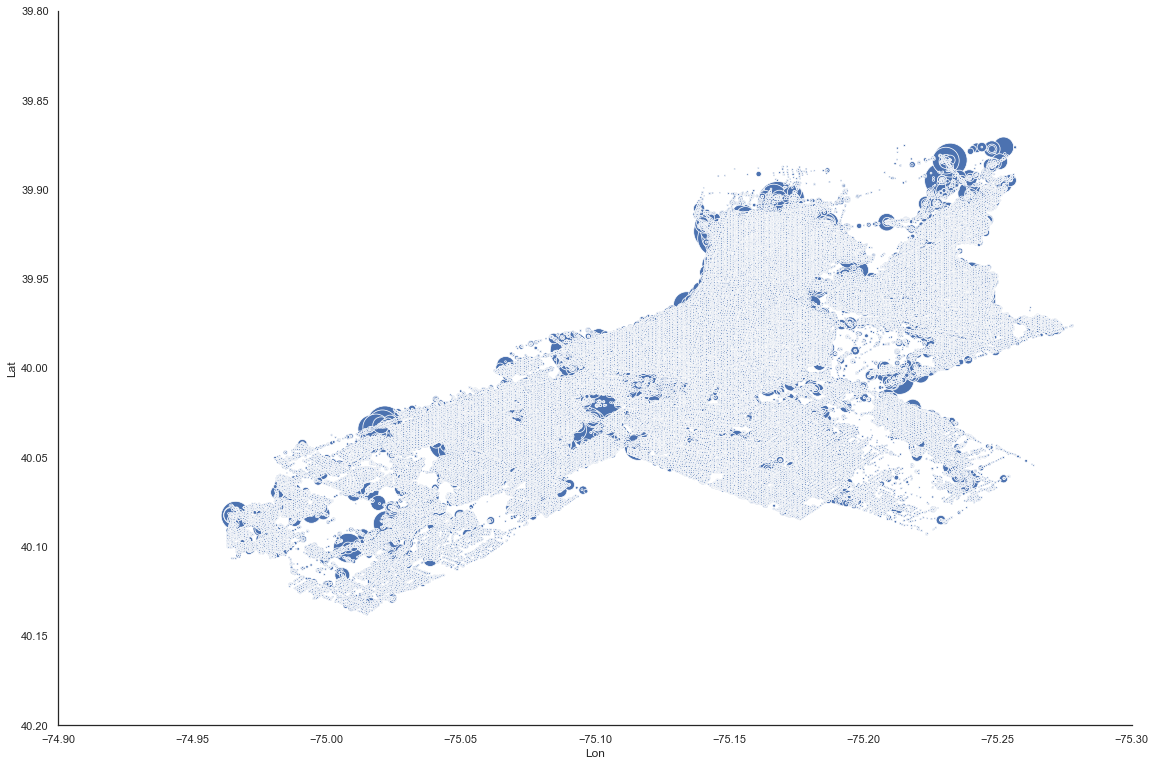

In [ ]:
sns.set(style="white")
splot = sns.relplot(x="Lon", y="Lat", size="events", sizes=(3,4300), legend=None, data=groupLonLatZip)
splot.fig.set_size_inches(20, 12)
plt.ylim(40.2, 39.8)
plt.xlim(-74.9,-75.3)


Map to int - 'Type', 'Wind_Category', 'Rain_Category', 'SEASON'

In [ ]:
l_dict = dict(zip(set(crimeData.Type), range(len(crimeData.Type))))
Type_num = [l_dict[x] for x in crimeData.Type]

l_dict = dict(zip(set(crimeData.Wind_Category), range(len(crimeData.Wind_Category))))
Wind_num = [l_dict[x] for x in crimeData.Wind_Category]

l_dict = dict(zip(set(crimeData.Rain_Category), range(len(crimeData.Rain_Category))))
Rain_num = [l_dict[x] for x in crimeData.Rain_Category]

l_dict = dict(zip(set(crimeData.SEASON), range(len(crimeData.SEASON))))
Season_num = [l_dict[x] for x in crimeData.SEASON]

In [ ]:
crimeData["Type_num"] = Type_num
crimeData["Wind_num"] = Wind_num
crimeData["Rain_num"] = Rain_num
crimeData["Season_num"] = Season_num

In [ ]:
crime_lim = crimeData[['Dc_Dist', 'Hour', 'Dc_Key', 'UCR_General',
       'Police_Districts', 'Month', 'Lon', 'Lat', 'Zip',
       'year', 'High Temp.', 'Low Temp.', 'Avg Temp.',
       'Temp Departure', 'HDD', 'CDD', 'GDD', 'Avg Dewpoint', 'Avg RH',
       'Avg Wind Speed', 'Avg Wind Dir', 'Avg Press', 'Total Precip',
       'Num Observations', 'Type_num', 'Wind_num', 'Rain_num', 'Season_num']]

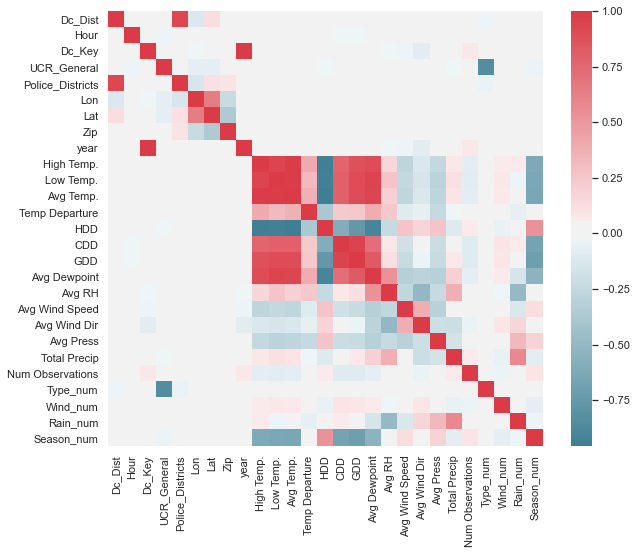

In [ ]:
# Correlation Matrix
f, ax = plt.subplots(figsize=(10, 8))
corr = crime_lim.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)


In [ ]:
# Correlation Matrix 2 (Top 10 crimes)

top10 = crimeData["Text_General_Code"].value_counts()[2:11].index

crime_top10_lim = crimeData[crimeData["Text_General_Code"].isin(top10)]


In [ ]:
crime_top10_lim.groupby(['Text_General_Code', 'Type']).sum().sort_values("events", ascending = False).reset_index()[['Zip', 'Text_General_Code', 'Type', 'events']]

,Zip,Text_General_Code,Type,events
0,4.819884e+09,Thefts,Violent,254577
1,3.809476e+09,Vandalism/Criminal Mischief,Non-Violent,199280
2,3.227888e+09,Theft from Vehicle,Violent,169463
3,2.610256e+09,Narcotic / Drug Law Violations,Non-Violent,136354
4,2.167400e+09,Fraud,Non-Violent,113450
5,1.799123e+09,Recovered Stolen Motor Vehicle,Violent,94120
6,1.798195e+09,Burglary Residential,Violent,93975
7,1.308622e+09,Aggravated Assault No Firearm,Violent,68381
8,1.006973e+09,DRIVING UNDER THE INFLUENCE,Non-Violent,52604


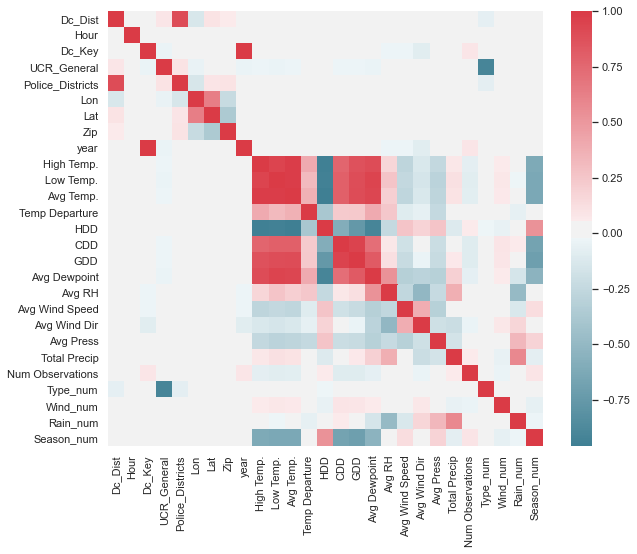

In [ ]:
crime_top10_lim = crime_top10_lim[['Dc_Dist', 'Hour', 'Dc_Key', 'UCR_General',
       'Police_Districts', 'Month', 'Lon', 'Lat', 'Zip',
       'year', 'High Temp.', 'Low Temp.', 'Avg Temp.',
       'Temp Departure', 'HDD', 'CDD', 'GDD', 'Avg Dewpoint', 'Avg RH',
       'Avg Wind Speed', 'Avg Wind Dir', 'Avg Press', 'Total Precip',
       'Num Observations', 'Type_num', 'Wind_num', 'Rain_num', 'Season_num']]

f, ax = plt.subplots(figsize=(10, 8))
corr = crime_top10_lim.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)


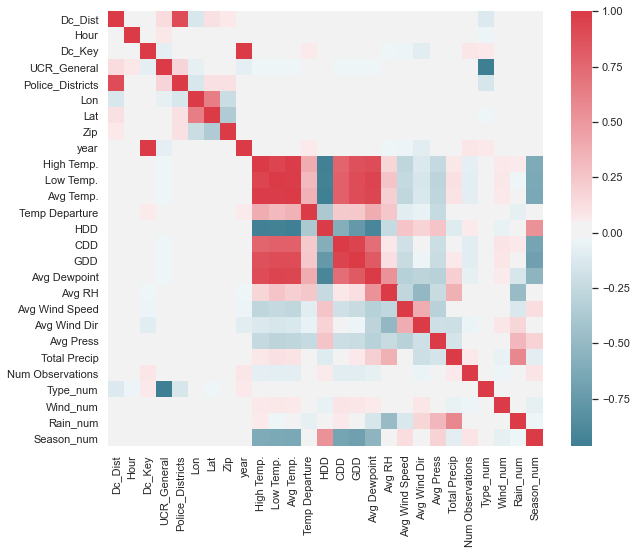

In [ ]:
# Correlation Matrix 3 (Top 5 crimes)

top5 = crimeData["Text_General_Code"].value_counts()[2:6].index

crime_top5_lim = crimeData[crimeData["Text_General_Code"].isin(top5)]

crime_top5_lim = crime_top5_lim[['Dc_Dist', 'Hour', 'Dc_Key', 'UCR_General',
       'Police_Districts', 'Month', 'Lon', 'Lat', 'Zip',
       'year', 'High Temp.', 'Low Temp.', 'Avg Temp.',
       'Temp Departure', 'HDD', 'CDD', 'GDD', 'Avg Dewpoint', 'Avg RH',
       'Avg Wind Speed', 'Avg Wind Dir', 'Avg Press', 'Total Precip',
       'Num Observations', 'Type_num', 'Wind_num', 'Rain_num', 'Season_num']]

f, ax = plt.subplots(figsize=(10, 8))
corr = crime_top5_lim.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)


## ML

In [ ]:
crimeData["Wind_Category"] = crimeData["Wind_Category"].map({'Light Breeze':1, 'Gentle Breeze':2, 'Light Air':3, 'Moderate Breeze':4,
       'Fresh Breeze':5, 'Strong Breeze':6})

crimeData["Rain_Category"] = crimeData["Rain_Category"].map({'No rain':1, 'Light rain':2, 'Moderate rain':3, 'Heavy rain':4})

crimeData["SEASON"] = crimeData["SEASON"].map({'Summer':3, "Spring":2, "Winter":1, "Fall":4})


In [ ]:
crimeData.loc[(crimeData['Text_General_Code'] == "Aggravated Assault Firearm") |  
        (crimeData['Text_General_Code'] == "Aggravated Assault No Firearm") | 
        (crimeData['Text_General_Code'] == "Other Assaults") |
        (crimeData['Text_General_Code'] == "Offenses Against Family and Children") |
        (crimeData['Text_General_Code'] == "Homicide - Criminal") |
        (crimeData['Text_General_Code'] == "Homicide - Gross Negligence") |
        (crimeData['Text_General_Code'] == "Homicide - Justifiable") |
        (crimeData['Text_General_Code'] == "Robbery Firearm") |
        (crimeData['Text_General_Code'] == "Robbery No Firearm")
        , "Group"] = "Crimes Against The Person"

crimeData.loc[(crimeData['Text_General_Code'] == "Prostitution and Commercialized Vice") |  
        (crimeData['Text_General_Code'] == "Rape") | 
        (crimeData['Text_General_Code'] == "Other Sex Offenses (Not Commercialized)")
        , "Group"] = "Sexual Offences"

crimeData.loc[(crimeData['Text_General_Code'] == "Arson") |  
        (crimeData['Text_General_Code'] == "Burglary Non-Residential") | 
        (crimeData['Text_General_Code'] == "Burglary Residential") |
        (crimeData['Text_General_Code'] == "Embezzlement") |
        (crimeData['Text_General_Code'] == "Forgery and Counterfeiting") |
        (crimeData['Text_General_Code'] == "Fraud") |
        (crimeData['Text_General_Code'] == "Receiving Stolen Property") |
        (crimeData['Text_General_Code'] == "Thefts") |
        (crimeData['Text_General_Code'] == "Motor Vehicle Theft") |
        (crimeData['Text_General_Code'] == "Theft from Vehicle") |
        (crimeData['Text_General_Code'] == "Vandalism/Criminal Mischief") |
        (crimeData['Text_General_Code'] == "Gambling Violations") |
        (crimeData['Text_General_Code'] == "Recovered Stolen Motor Vehicle")
        , "Group"] = "Crimes Against The Property"

crimeData.loc[(crimeData['Text_General_Code'] == "Narcotic / Drug Law Violations") |  
        (crimeData['Text_General_Code'] == "Public Drunkenness") | 
        (crimeData['Text_General_Code'] == "Liquor Law Violations") |
        (crimeData['Text_General_Code'] == "Disorderly Conduct") |
        (crimeData['Text_General_Code'] == "Vagrancy/Loitering") |
        (crimeData['Text_General_Code'] == "DRIVING UNDER THE INFLUENCE") |
        (crimeData['Text_General_Code'] == "Weapon Violations")
        , "Group"] = "Crimes Against The Public"

crimeData.loc[crimeData['Text_General_Code'] == "All Other Offenses" , "Group"] = "Other"


In [ ]:
crimeData.Group.value_counts()

Crimes Against The Property    1010858
Crimes Against The Person       467782
Other                           434335
Crimes Against The Public       264279
Sexual Offences                  39767
Name: Group, dtype: int64

In [ ]:
crimeData["Group_num"] = crimeData["Group"].map({'Crimes Against The Person':1, "Crimes Against The Property":2, 
                                                 "Sexual Offences":3, "Crimes Against The Public":4, "Other":5})


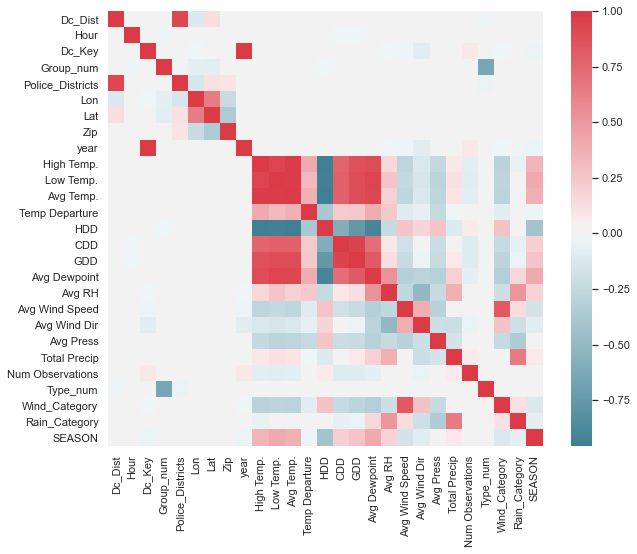

In [ ]:
crime_lim_new = crimeData[['Dc_Dist', 'Hour', 'Dc_Key', 'Group_num',
       'Police_Districts', 'Month', 'Lon', 'Lat', 'Zip',
       'year', 'High Temp.', 'Low Temp.', 'Avg Temp.',
       'Temp Departure', 'HDD', 'CDD', 'GDD', 'Avg Dewpoint', 'Avg RH',
       'Avg Wind Speed', 'Avg Wind Dir', 'Avg Press', 'Total Precip',
       'Num Observations', 'Type_num', 'Wind_Category', 'Rain_Category', 'SEASON']]

f, ax = plt.subplots(figsize=(10, 8))
corr = crime_lim_new.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)


In [ ]:
# sampleData = crimeData.sample(50000)

In [ ]:
#simpleData = crimeData[['Lon', 'Lat', 'Text_General_Code']]
simpleData = crimeData[['Lon', 'Lat', 'Group']]

In [ ]:
# features and y
X = simpleData.iloc[:, :-1].values
y = simpleData.iloc[:, 2].values

In [ ]:
# train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# classifier = KNeighborsClassifier(n_neighbors=45)
# classifier.fit(X_train, y_train)


In [ ]:
# y_pred = classifier.predict(X_test)

In [ ]:
# from sklearn.metrics import classification_report, confusion_matrix
# print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

error_rate = []
# Will take some time

value = [2,5,10,15,20,30,35,40,45,50]

for i in value:
    print(i)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


2
5
10
15
20
30
35
40
45
50


Text(0, 0.5, 'Mean Error')

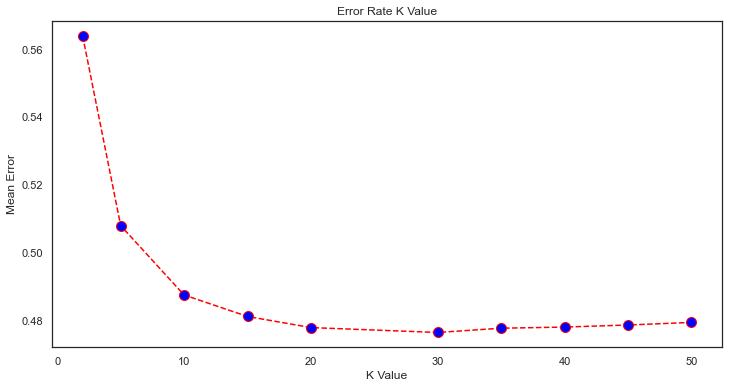

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(value, error_rate, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


In [ ]:
# With best n_neighbors
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=30)
classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=30)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))


                             precision    recall  f1-score   support

  Crimes Against The Person       0.37      0.20      0.26    140583
Crimes Against The Property       0.59      0.80      0.68    303060
  Crimes Against The Public       0.41      0.26      0.32     79197
                      Other       0.46      0.44      0.45    130355
            Sexual Offences       0.42      0.11      0.18     11912

                   accuracy                           0.52    665107
                  macro avg       0.45      0.36      0.38    665107
               weighted avg       0.49      0.52      0.49    665107



## Feature Selection

In [ ]:
crime_lim2 = crimeData[['Group','Dc_Dist', 'Hour', 'Dc_Key',
       'Police_Districts', 'Lon', 'Lat', 'Zip',
       'year', 'High Temp.', 'Low Temp.', 'Avg Temp.',
       'Temp Departure', 'HDD', 'CDD', 'GDD', 'Avg Dewpoint', 'Avg RH',
       'Avg Wind Speed', 'Avg Wind Dir', 'Avg Press', 'Total Precip',
       'Num Observations', 'Type_num', 'Wind_Category', 'Rain_Category', 'SEASON']]

In [ ]:
crime_lim2.columns[1:27]

Index(['Dc_Dist', 'Hour', 'Dc_Key', 'Police_Districts', 'Lon', 'Lat', 'Zip',
       'year', 'High Temp.', 'Low Temp.', 'Avg Temp.', 'Temp Departure', 'HDD',
       'CDD', 'GDD', 'Avg Dewpoint', 'Avg RH', 'Avg Wind Speed',
       'Avg Wind Dir', 'Avg Press', 'Total Precip', 'Num Observations',
       'Type_num', 'Wind_Category', 'Rain_Category', 'SEASON'],
      dtype='object')

In [ ]:
# sampleData2 = crime_lim2.sample(100000)

In [ ]:
sampleData2 = crime_lim2.fillna(0)

In [ ]:
# Feature Selection with Univariate Statistical Tests
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X = sampleData2.iloc[:, 1:27].values
Y = sampleData2.iloc[:, 0].values
# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[2.736e+03 2.309e+03 4.976e+02 4.915e+03 3.543e+03 3.578e+03 9.288e+02
 5.387e+02 1.046e+03 1.064e+03 1.093e+03 4.814e+01 8.110e+02 1.095e+03
 1.169e+03 7.681e+02 8.324e+01 9.917e+01 2.420e+01 3.762e+01 8.600e+01
 3.353e+01 4.756e+05 1.491e+02 4.592e+01 3.453e+02]
[[ 20.    -75.13   40.036   0.   ]
 [  8.    -75.166  39.97    0.   ]
 [ 13.    -75.166  39.94    2.   ]
 [ 16.    -75.171  39.98    1.   ]
 [ 16.    -75.16   39.976   2.   ]]


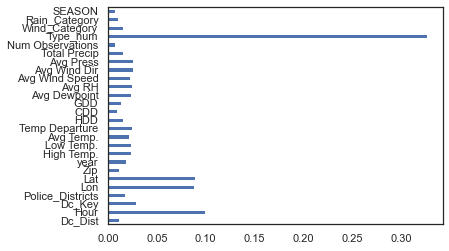

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import ExtraTreeClassifier

feature_importance = ExtraTreeClassifier().fit(X, Y)
feature_importance_visualization = pd.Series(feature_importance.feature_importances_, index = crime_lim2.columns[1:27])
feature_importance_visualization.plot(kind="barh")
plt.show()

In [ ]:
sampleData2.iloc[:, 1:27].columns

Index(['Dc_Dist', 'Hour', 'Dc_Key', 'Police_Districts', 'Lon', 'Lat', 'Zip',
       'year', 'High Temp.', 'Low Temp.', 'Avg Temp.', 'Temp Departure', 'HDD',
       'CDD', 'GDD', 'Avg Dewpoint', 'Avg RH', 'Avg Wind Speed',
       'Avg Wind Dir', 'Avg Press', 'Total Precip', 'Num Observations',
       'Type_num', 'Wind_num', 'Rain_num', 'Season_num'],
      dtype='object')

DC_Dist, Hour, Police Dist, Lon, Lat

In [ ]:
test2 = sampleData2[["Hour", "Lon", "Lat", "Group"]]

In [ ]:
# features and y
X = test2.iloc[:, :-1].values
y = test2.iloc[:, 3].values


error_rate = []
# Will take some time

value = [2,5,10,15,20,30,35,40,45,50]

for i in value:
    print(i)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


2
5
10
15
20
30
35
40
45
50


Text(0, 0.5, 'Mean Error')

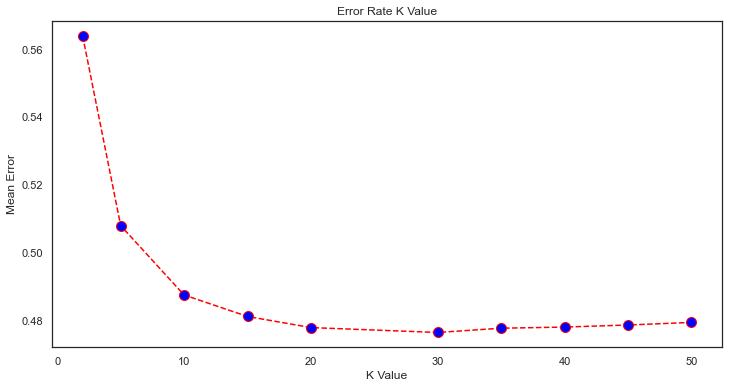

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(value, error_rate, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


In [ ]:
# train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=30)
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))


                             precision    recall  f1-score   support

  Crimes Against The Person       0.32      0.18      0.23    140263
Crimes Against The Property       0.59      0.81      0.68    302687
  Crimes Against The Public       0.40      0.21      0.28     79389
                      Other       0.50      0.48      0.49    130846
            Sexual Offences       0.46      0.12      0.19     11922

                   accuracy                           0.53    665107
                  macro avg       0.45      0.36      0.37    665107
               weighted avg       0.49      0.53      0.49    665107

